### Predicting a Biological Response

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('phpSSK7iA.csv')

In [4]:
print(data.head())
print(data.info())
print(data.describe())

         D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   

         D9       D10  ...  D1768  D1769  D1770  D1771  D1772  D1773  D1774  \
0  0.743663  0.243144  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  0.836582  0.106480  ...    1.0    1.0    1.0    0.0    1.0    0.0    0.0   
2  0.679051  0.352308  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  0.805110  0.208989  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  0.812646  0.125177  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   D1775  D1776  target  
0    0.0    0.0       1  
1    1.0    0.0 

Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution.

In [26]:
x = data.iloc[:, 0:1776]  # Input features (molecular descriptors)
y = data.iloc[:, -1]   # Target variable (biological response)

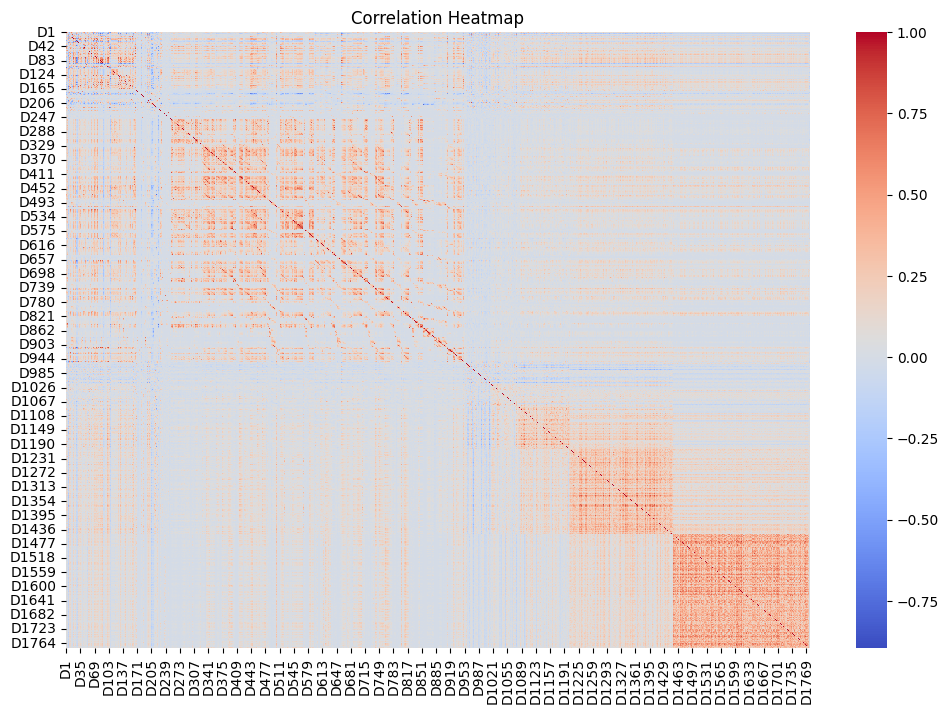

In [14]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Have to clean the fetures(Feature selection/Feature grouping/Filtering based on correlation threshold)

C:\Users\nagya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


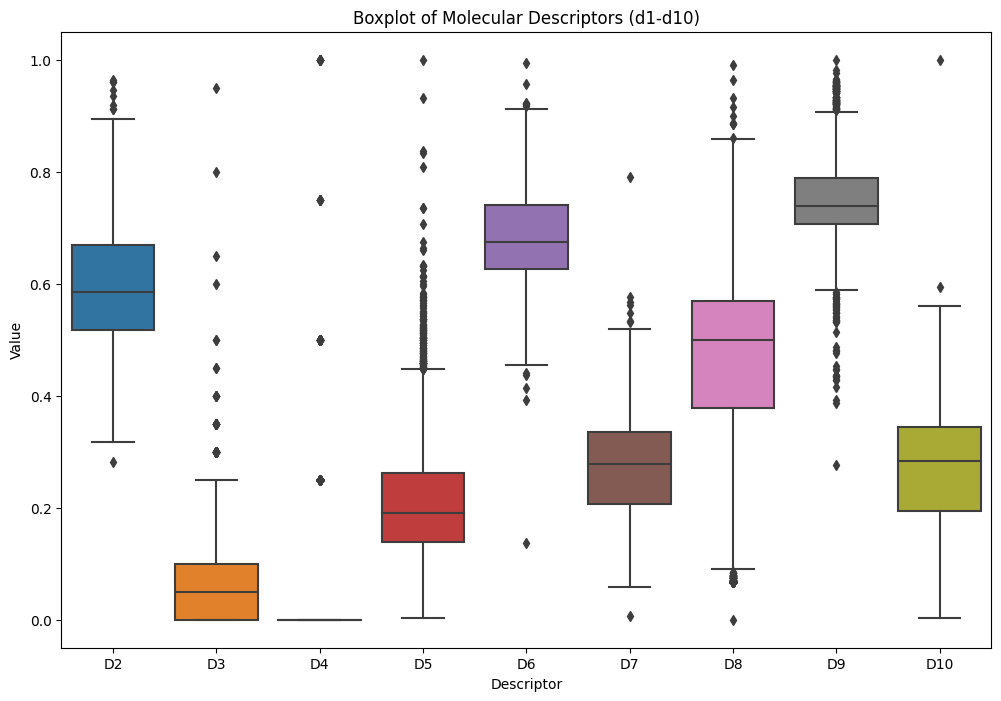

In [12]:
# Plot the boxplots for the first few descriptors
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.iloc[:, 1:10])
plt.title('Boxplot of Molecular Descriptors (d1-d10)')
plt.xlabel('Descriptor')
plt.ylabel('Value')
plt.show()

In [28]:
y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: target, Length: 3751, dtype: int64